Converged after 9581 iterations


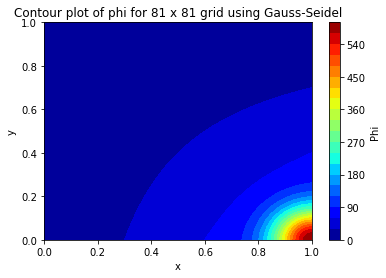

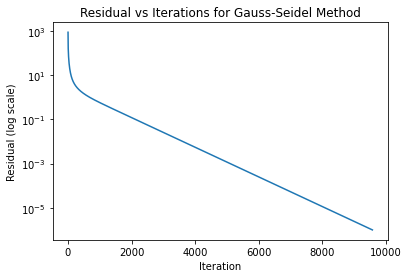

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 1.0  # Length of the domain
nx, ny = 161, 161  # Number of grid points in x and y
dx = L / (nx - 1)
dy = L / (ny - 1)
max_iter = 10000  # Maximum number of iterations
tolerance = 1e-6  # Convergence tolerance

# Source term function
def source_term(x, y):
    return 50000 * np.exp(-50 * ((1 - x) ** 2 + y ** 2)) * (100 * ((1 - x) ** 2 + y ** 2) - 2)

# Boundary conditions
def phi_bc(x, y, side):
    if side == 'left':
        return 500 * np.exp(-50 * (1 + y ** 2))
    elif side == 'right':
        return 100 * (1 - y) + 500 * np.exp(-50 * y ** 2)
    elif side == 'bottom':
        return 100 * x + 500 * np.exp(-50 * (1 - x) ** 2)
    elif side == 'top':
        return 500 * np.exp(-50 * ((1 - x) ** 2 + 1))

# Initialize the solution field
phi = np.zeros((ny, nx))

# Set boundary conditions
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)

for j in range(ny):
    phi[j, 0] = phi_bc(0, y[j], 'left')      # Left boundary
    phi[j, -1] = phi_bc(1, y[j], 'right')    # Right boundary

for i in range(nx):
    phi[0, i] = phi_bc(x[i], 0, 'bottom')    # Bottom boundary
    phi[-1, i] = phi_bc(x[i], 1, 'top')      # Top boundary

# Gauss-Seidel Iterative Method
residuals = []  # To track residuals for plotting

for iteration in range(max_iter):
    phi_old = np.copy(phi)
    
    for j in range(1, ny-1):
        for i in range(1, nx-1):
            phi[j, i] = 0.25 * (phi[j+1, i] + phi[j-1, i] + phi[j, i+1] + phi[j, i-1] 
                                 - dx * dy * source_term(x[i], y[j]))

    # Calculate the residual as the norm of the difference
    residual = np.linalg.norm(phi - phi_old)
    residuals.append(residual)
    
    if residual < tolerance:
        print(f'Converged after {iteration+1} iterations')
        break

# Plot the final solution as a contour plot
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, phi, 20, cmap='jet')
plt.colorbar(label='Phi')
plt.title(f'Contour plot of phi for {nx} x {ny} grid using Gauss-Seidel')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the residuals vs iterations
plt.plot(residuals)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual (log scale)')
plt.title('Residual vs Iterations for Gauss-Seidel Method')
plt.show()
